Epoch 1/20
1/1 [==============================] - 0s 997us/step - loss: 0.0072
Epoch 2/20
1/1 [==============================] - 0s 997us/step - loss: 0.0373
Epoch 3/20
1/1 [==============================] - 0s 997us/step - loss: 0.0028
Epoch 4/20
1/1 [==============================] - 0s 0s/step - loss: 0.0074
Epoch 5/20
1/1 [==============================] - 0s 997us/step - loss: 0.0064
Epoch 6/20
1/1 [==============================] - 0s 0s/step - loss: 0.0039
Epoch 7/20
1/1 [==============================] - 0s 0s/step - loss: 0.0032
Epoch 8/20
1/1 [==============================] - 0s 998us/step - loss: 0.0045
Epoch 9/20
1/1 [==============================] - 0s 998us/step - loss: 0.0045
Epoch 10/20
1/1 [==============================] - 0s 998us/step - loss: 0.0036
Epoch 11/20
1/1 [==============================] - 0s 998us/step - loss: 0.0025
Epoch 12/20
1/1 [==============================] - 0s 998us/step - loss: 0.0041
Epoch 13/20
1/1 [==============================] - 0s 997u

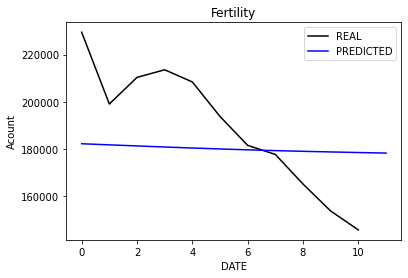

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

dataset_train = pd.read_csv('Fertility_2022-07-15.csv')
trainning_set = dataset_train.iloc[:,1:2].values #iolc讀其中一個欄位
dataset_train.head()
sc = MinMaxScaler(feature_range = (0 , 1)) #0-1的範圍
training_set_scaled = sc.fit_transform(trainning_set)
# print(training_set_scaled[0])

x_train = []
y_train = []
for i in range(50,52): 
    x_train.append(training_set_scaled[i-50:i , 0])
    y_train.append(training_set_scaled[i , 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
# print(x_train.shape[0])  #1975天
# print(x_train.shape[1])
x_train = np.reshape(x_train,(2,50,1))
# print(x_train[100])
# print(y_train[100])

model = Sequential()
model.add(LSTM(units = 50, return_sequences=True , input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 516 ,return_sequences=True)) 
model.add(Dropout(0.2))

model.add(LSTM(units = 128 )) 
model.add(Dropout(0.2))


model.add(Dense(units=1))

model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20,batch_size=32)

dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:,1:2].values  #第一第二列
data_total = pd.concat((dataset_train['MidPredict'],dataset_test['MidPredict']), axis = 0)
inputs = data_total[len(data_total) - len(dataset_test) - 50:].values
# print(data_total.shape[0])
inputs = inputs.reshape(-1,1)
# print(inputs.shape[0])
inputs = sc.transform(inputs)
# print(inputs.shape[0])
x_test = []

for i in range(50,66):
    x_test.append(inputs[i-50:i,0])
x_test = np.array(x_test)
# print(x_test.shape[0])   #16
# print(x_test.shape[1])   #50

x_test = np.reshape(x_test,(16,50,1))
predicted_stock_value = model.predict(x_test)
predicted_stock_value = sc.inverse_transform(predicted_stock_value)

# print(real_stock_price)
# print(predicted_stock_value)

plt.plot(real_stock_price,color = 'black' , label='REAL')
plt.plot(predicted_stock_value , color = 'blue' , label='PREDICTED')
plt.title('Fertility')
plt.xlabel('DATE')
plt.ylabel('Acount')
plt.legend()
plt.show()